In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

print(tf.config.list_physical_devices('GPU'))

2023-07-10 17:00:22.131360: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-10 17:00:22.160353: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 17:00:22.651200: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/tanzid/miniconda3/envs/tf/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_t

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-07-10 17:00:23.323739: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-10 17:00:23.352256: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-10 17:00:23.352589: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


We will now build a model with an `LSTM layer`` for the task of sentiment analysis on the IMDB reviews dataset (tokenized subwords).

In [2]:
# load the dataset
dataset, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True) 

# get the tokenizer
tokenizer = info.features['text'].encoder

2023-07-08 23:36:52.288676: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-08 23:36:52.289444: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-08 23:36:52.290261: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-08 23:36:52.948771: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-08 23:36:52.949354: I tensorflow/compile

In [3]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# get train, test splits
train_data, test_data = dataset['train'], dataset['test'] 

# shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# pad the sequences and make batches
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [10]:
# model hyperparameters
embedding_dim = 32
lstm_dim = 64
dense_dim = 16

# build the model, the oujtput from the embedding layer will be fed into an LSTM nested inside a Bidirectional Layer
model = tf.keras.models.Sequential([Embedding(tokenizer.vocab_size, embedding_dim),
                                    Bidirectional(LSTM(lstm_dim)),
                                    Dense(dense_dim, activation='relu'),
                                    Dense(1, activation='sigmoid')])

model.summary()

print(tf.config.list_physical_devices('GPU'))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          261920    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              49664     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 16)                2064      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 313,665
Trainable params: 313,665
Non-trainable params: 0
_________________________________________________________________
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-07-08 23:06:10.210450: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-08 23:06:10.211158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-08 23:06:10.212060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [11]:
# compile and train the model
NUM_EPOCHS = 15

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, validation_data=test_dataset, epochs=NUM_EPOCHS)

Epoch 1/15


2023-07-08 23:06:11.634485: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-08 23:06:11.635531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-08 23:06:11.636329: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

98/98 [==============================] - ETA: 0s - loss: 0.6139 - accuracy: 0.6443

2023-07-08 23:06:35.098857: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-08 23:06:35.099749: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-08 23:06:35.100419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

98/98 [==============================] - 29s 276ms/step - loss: 0.6139 - accuracy: 0.6443 - val_loss: 0.4578 - val_accuracy: 0.7937
Epoch 2/15
98/98 [==============================] - 25s 251ms/step - loss: 0.3551 - accuracy: 0.8558 - val_loss: 0.4122 - val_accuracy: 0.8247
Epoch 3/15
98/98 [==============================] - 22s 228ms/step - loss: 0.2694 - accuracy: 0.8982 - val_loss: 0.3919 - val_accuracy: 0.8548
Epoch 4/15
98/98 [==============================] - 22s 221ms/step - loss: 0.2382 - accuracy: 0.9123 - val_loss: 0.4111 - val_accuracy: 0.8388
Epoch 5/15
98/98 [==============================] - 22s 223ms/step - loss: 0.1864 - accuracy: 0.9354 - val_loss: 0.3973 - val_accuracy: 0.8482
Epoch 6/15
98/98 [==============================] - 22s 227ms/step - loss: 0.1565 - accuracy: 0.9472 - val_loss: 0.4474 - val_accuracy: 0.8518
Epoch 7/15
98/98 [==============================] - 21s 217ms/step - loss: 0.1417 - accuracy: 0.9541 - val_loss: 0.4593 - val_accuracy: 0.8422
Epoch 8/15

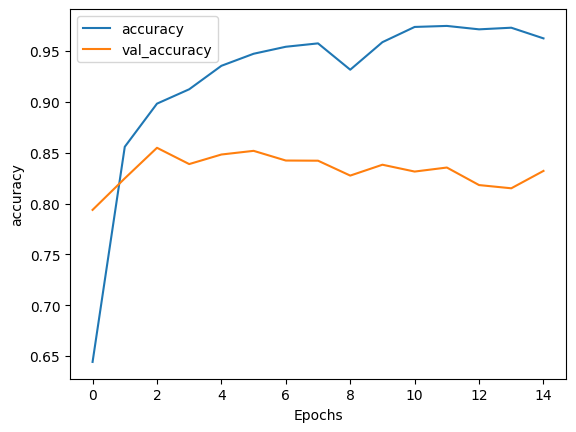

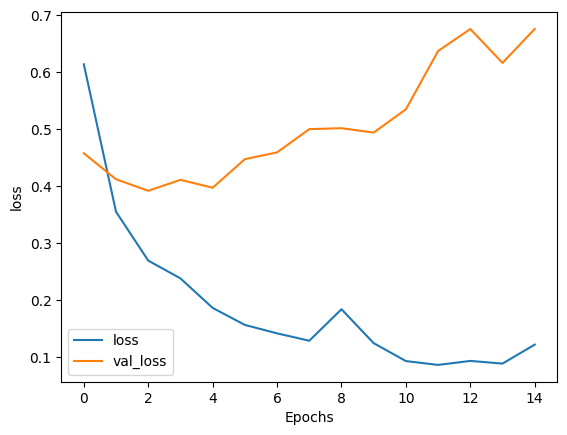

In [12]:
import matplotlib.pyplot as plt 

# lets now plot some learning curves
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history["val_"+metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, "val_"+metric])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


Bidirectional LSTM layers can also be stacked. For stacked LSTM layers, every layer except for the last one needs to have the `return_sequences` flag set to `True` 

In [4]:
# model hyperparameters
embedding_dim = 32
lstm_dim1 = 32
lstm_dim2 = 16
dense_dim = 8

# build the model, the oujtput from the embedding layer will be fed into an LSTM nested inside a Bidirectional Layer
model = tf.keras.models.Sequential([Embedding(tokenizer.vocab_size, embedding_dim),
                                    Bidirectional(LSTM(lstm_dim1, return_sequences=True)),
                                    Bidirectional(LSTM(lstm_dim2)),
                                    Dense(dense_dim, activation='relu'),
                                    Dense(1, activation='sigmoid')])

model.summary()

print(tf.config.list_physical_devices('GPU'))

2023-07-08 23:37:27.213060: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-08 23:37:27.214133: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-08 23:37:27.215009: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          261920    
                                                                 
 bidirectional (Bidirectiona  (None, None, 64)         16640     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 32)               10368     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 289,201
Trainable params: 289,201
Non-trai

2023-07-08 23:37:27.450880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis' with dtype int32 and shape [1]
	 [[{{node gradients/ReverseV2_grad/ReverseV2/ReverseV2/axis}}]]
2023-07-08 23:37:27.472296: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-08 23:37:27.472989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message):

In [5]:
# compile and train the model
NUM_EPOCHS = 10

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, validation_data=test_dataset, epochs=NUM_EPOCHS)


Epoch 1/10


2023-07-08 23:37:34.711710: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [1]
	 [[{{node Placeholder/_4}}]]
2023-07-08 23:37:34.712050: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]
2023-07-08 23:37:34.831651: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dty

391/391 [==============================] - ETA: 0s - loss: 0.5758 - accuracy: 0.6857

2023-07-08 23:39:13.390878: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1]
	 [[{{node Placeholder/_0}}]]
2023-07-08 23:39:13.391204: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [1]
	 [[{{node Placeholder/_3}}]]
2023-07-08 23:39:13.507630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dt

391/391 [==============================] - 129s 317ms/step - loss: 0.5758 - accuracy: 0.6857 - val_loss: 0.5053 - val_accuracy: 0.7770
Epoch 2/10
391/391 [==============================] - 117s 298ms/step - loss: 0.3657 - accuracy: 0.8498 - val_loss: 0.4359 - val_accuracy: 0.8001
Epoch 3/10
391/391 [==============================] - 129s 330ms/step - loss: 0.2965 - accuracy: 0.8866 - val_loss: 0.4049 - val_accuracy: 0.8319
Epoch 4/10
391/391 [==============================] - 102s 261ms/step - loss: 0.2492 - accuracy: 0.9064 - val_loss: 0.4421 - val_accuracy: 0.8278
Epoch 5/10
391/391 [==============================] - 101s 258ms/step - loss: 0.1966 - accuracy: 0.9315 - val_loss: 0.4255 - val_accuracy: 0.8414
Epoch 6/10
391/391 [==============================] - 110s 282ms/step - loss: 0.1756 - accuracy: 0.9381 - val_loss: 0.4966 - val_accuracy: 0.8276
Epoch 7/10
391/391 [==============================] - 101s 257ms/step - loss: 0.1581 - accuracy: 0.9462 - val_loss: 0.5168 - val_accura

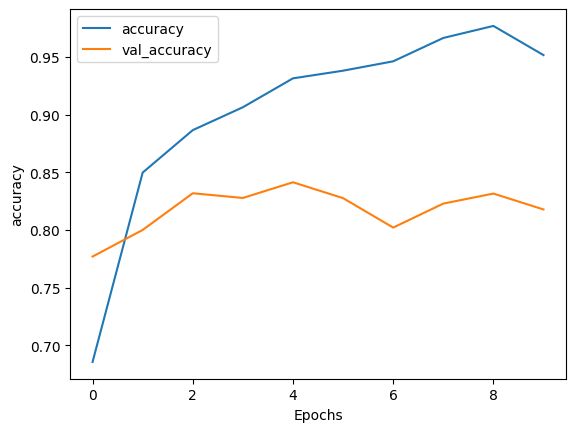

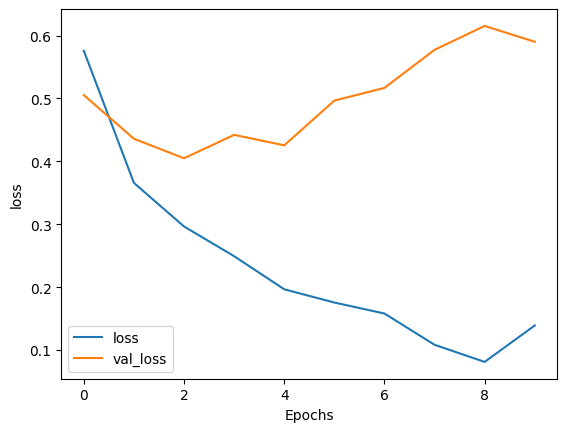

In [6]:
import matplotlib.pyplot as plt 

# lets now plot some learning curves
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history["val_"+metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, "val_"+metric])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


11